**Raport dotyczący analizy EOG: Bartosz Kundera**

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.signal as ss
import gdown

In [171]:
gdown.download('https://drive.google.com/file/d/1bVCM00u6onL6B_sV2Dq5TWIjbP9nyhdh/view?usp=sharing', fuzzy=True)
gdown.download('https://drive.google.com/file/d/1E0PWRx3UwhGuL9vUB0teU9x4Zcayfyzr/view?usp=sharing', fuzzy=True)
gdown.download('https://drive.google.com/file/d/1CiTcrOKNpHLRb_WkkcaKEUen5YlPXTcm/view?usp=sharing', fuzzy=True)
gdown.download('https://drive.google.com/file/d/1rmV8sTQBbR1Pf_iPKitsDfW98wA_CwYC/view?usp=sharing', fuzzy=True)
gdown.download('https://drive.google.com/file/d/1cRtk3DDsta09AyZBZ-3nR1nJU2c_zEap/view?usp=sharing', fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1bVCM00u6onL6B_sV2Dq5TWIjbP9nyhdh
To: /content/EOGGB.obci.raw
100%|██████████| 78.6k/78.6k [00:00<00:00, 63.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E0PWRx3UwhGuL9vUB0teU9x4Zcayfyzr
To: /content/CzytanieSL.obci.raw
100%|██████████| 72.6k/72.6k [00:00<00:00, 21.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CiTcrOKNpHLRb_WkkcaKEUen5YlPXTcm
To: /content/CzytaniePL.obci.raw
100%|██████████| 51.3k/51.3k [00:00<00:00, 45.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rmV8sTQBbR1Pf_iPKitsDfW98wA_CwYC
To: /content/Mruganie.obci.raw
100%|██████████| 109k/109k [00:00<00:00, 69.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cRtk3DDsta09AyZBZ-3nR1nJU2c_zEap
To: /content/sąd.obci.raw
100%|██████████| 106k/106k [00:00<00:00, 20.8MB/s]


'sąd.obci.raw'

In [183]:
fs = 128

def wczytywanie(file_path):
    data = np.fromfile(file_path, dtype="float32").reshape(-1,2)
    return data[:,0], data[:,1]

def filtry(signal, Fs):

    sos_high = ss.butter(8, 0.1, fs=Fs, btype="high", output="sos")
    sos_low = ss.butter(2, 15, fs=Fs, btype="low", output="sos")
    b_notch, a_notch = ss.iirnotch(50, Q=30, fs=Fs)

    signal = ss.sosfiltfilt(sos_high, signal)
    signal = ss.sosfiltfilt(sos_low, signal)
    signal = ss.lfilter(b_notch, a_notch, signal)
    return signal* 0.0715


def filtry15(signal, Fs):
    sos_high = ss.butter(8, 0.1, fs=Fs, btype="high", output="sos")
    sos_low = ss.butter(2, 15, fs=Fs, btype="low", output="sos")
    b_notch, a_notch = ss.iirnotch(50, Q=30, fs=Fs)

    signal = ss.sosfiltfilt(sos_high, signal)
    signal = ss.sosfiltfilt(sos_low, signal)
    signal = ss.lfilter(b_notch, a_notch, signal)
    return signal

def filtry30(signal, Fs):

    sos_high = ss.butter(8, 0.1, fs=Fs, btype="high", output="sos")
    sos_low = ss.butter(2, 30, fs=Fs, btype="low", output="sos")
    b_notch, a_notch = ss.iirnotch(50, Q=30, fs=Fs)

    signal = ss.sosfiltfilt(sos_high, signal)
    signal = ss.sosfiltfilt(sos_low, signal)
    signal = ss.lfilter(b_notch, a_notch, signal)
    return signal * 0.0715



def filtry1(signal, Fs, highpass_freqs=[0.1, 0.25, 0.5, 1, 2, 4]):


    filtered_signals = []
    b_notch, a_notch = ss.iirnotch(50, Q=30, fs=Fs)
    sos_low = ss.butter(2, 15, fs=Fs, btype="low", output="sos")

    for hp_freq in highpass_freqs:
        sos_high = ss.butter(8, hp_freq, fs=Fs, btype="high", output="sos")

        sig = ss.sosfiltfilt(sos_high, signal)
        sig = ss.sosfiltfilt(sos_low, sig)
        sig = ss.lfilter(b_notch, a_notch, sig)

        filtered_signals.append(sig * 0.0715)

    return filtered_signals

def filtry2(signal, Fs, highpass_freqs=[0.1, 0.25, 0.5, 1, 2, 4]):

    filtered_signals = []
    b_notch, a_notch = ss.iirnotch(50, Q=30, fs=Fs)
    sos_low = ss.butter(2, 30, fs=Fs, btype="low", output="sos")

    for hp_freq in highpass_freqs:
        sos_high = ss.butter(8, hp_freq, fs=Fs, btype="high", output="sos")

        sig = ss.sosfiltfilt(sos_high, signal)
        sig = ss.sosfiltfilt(sos_low, sig)
        sig = ss.lfilter(b_notch, a_notch, sig)

        filtered_signals.append(sig * 0.0715)

    return filtered_signals


### Ćwiczenie 1:
W tej części pokazano wykresy EOG odpowiadające ruchom góra-dół oraz lewo-prawo. Sygnały potraktowano odpowiednimi filtrami, a następnie porównano na wykresach

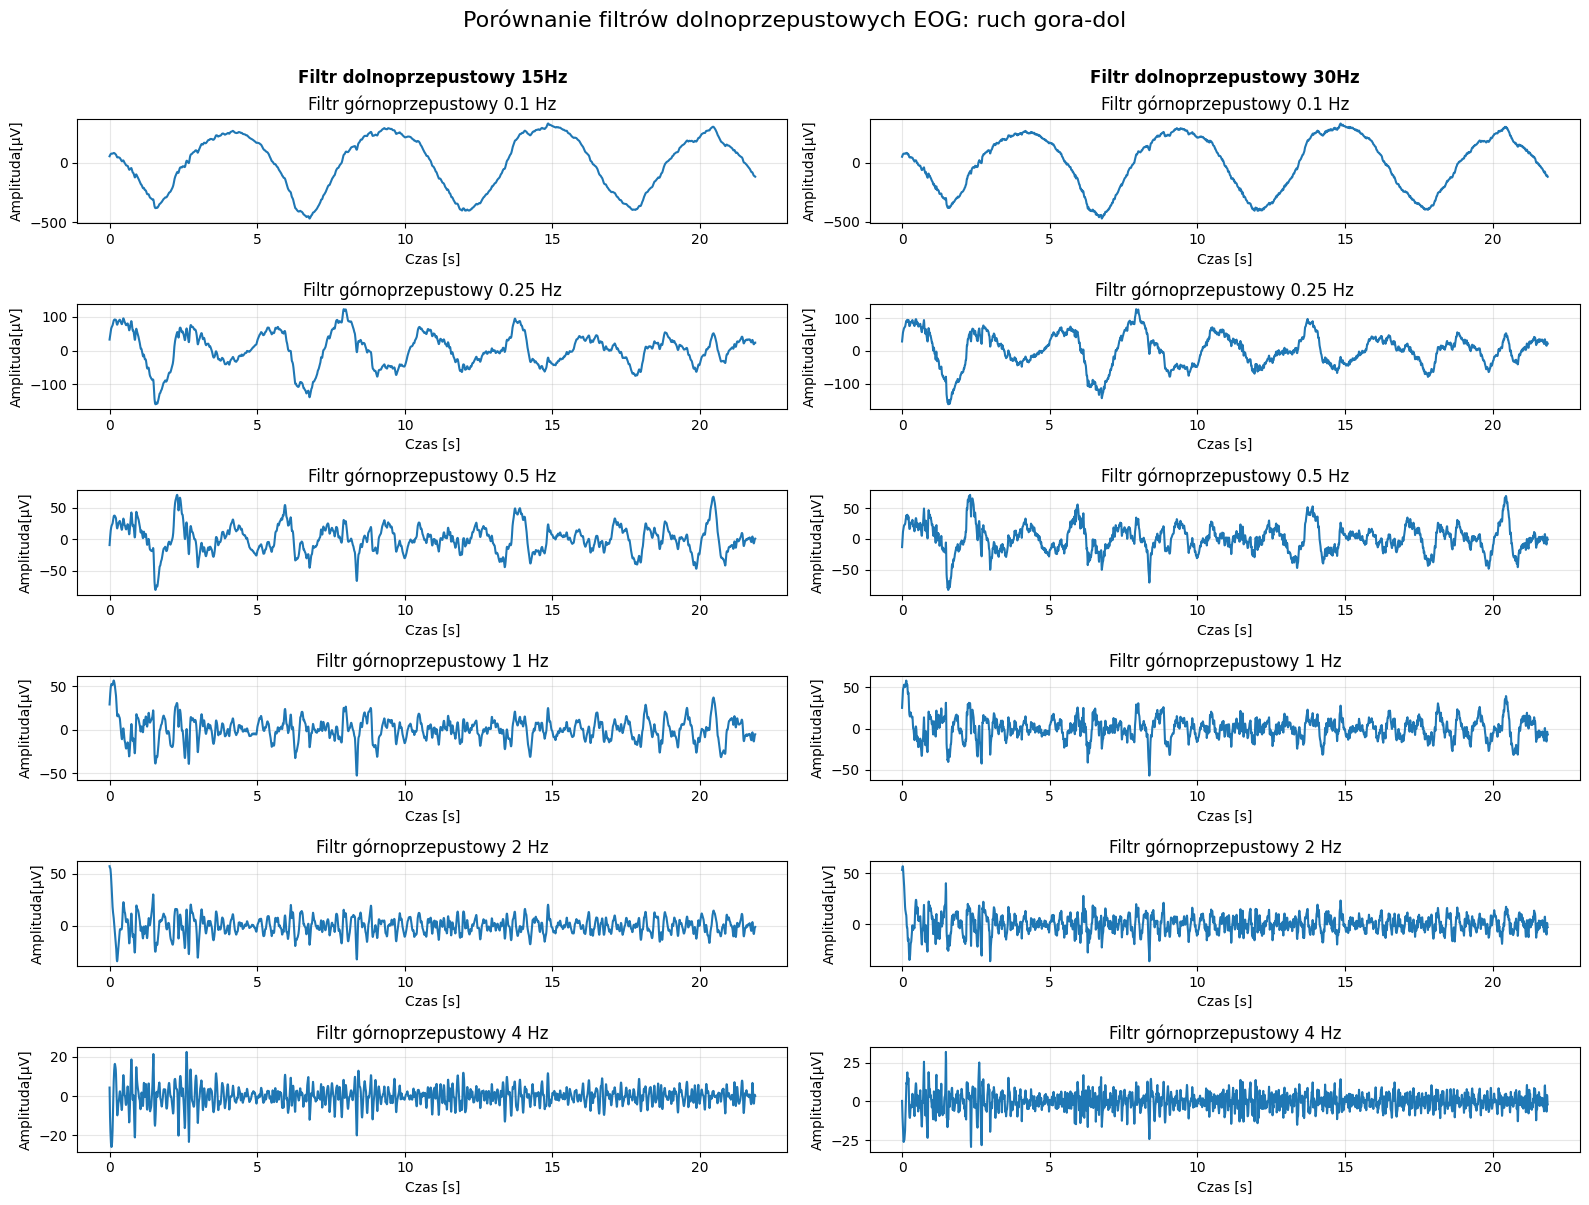

In [184]:
gora_dol, prawo_lewo = wczytywanie("EOGGB.obci.raw")
filtered1 = filtry1(gora_dol, fs)
filtered2 = filtry2(gora_dol, fs)

freqs = [0.1, 0.25, 0.5, 1, 2, 4]
EOGGB_segments1 = []
EOGGB_segments2 = []

for sig in filtered1:
    segment = sig[2000:4800]
    EOGGB_segments1.append(segment)

for sig in filtered2:
    segment = sig[2000:4800]
    EOGGB_segments2.append(segment)

t = np.arange(0, len(EOGGB_segments1[0])/fs, 1/fs)
plt.figure(figsize=(16, 12))
plt.suptitle('Porównanie filtrów dolnoprzepustowych EOG: ruch gora-dol', fontsize=16, y=1)

for i in range(6):
    # Lewa kolumna 15Hz
    plt.subplot(6, 2, 2*i + 1)
    plt.plot(t, EOGGB_segments1[i])
    plt.title(f'Filtr górnoprzepustowy {freqs[i]} Hz')
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda[μV]')
    plt.grid(True, alpha=0.3)

    # nagłówek 1 kolumny
    if i == 0:
        plt.text(0.5, 1.3, 'Filtr dolnoprzepustowy 15Hz',
                transform=plt.gca().transAxes, ha='center', va='bottom',
                fontsize=12, fontweight='bold')

    # Prawa kolumna 30Hz
    plt.subplot(6, 2, 2*i + 2)
    plt.plot(t, EOGGB_segments2[i])
    plt.title(f'Filtr górnoprzepustowy {freqs[i]} Hz')
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda[μV]')
    plt.grid(True, alpha=0.3)

    # nagłówek 2 kolumny
    if i == 0:
        plt.text(0.5, 1.3, 'Filtr dolnoprzepustowy 30Hz',
                transform=plt.gca().transAxes, ha='center', va='bottom',
                fontsize=12, fontweight='bold')
        plt.tight_layout()

plt.tight_layout()
plt.show()

Jak widać na powyższych wykresach przedstawiająch sygnały EOG góra dół, wraz ze wzrostem częstotliwości przenoszenia dla filtrów górnopzrepustowych, sygnał zaczyna byc mniej dokładny i bardziej chaotyczny oraz zaszumiony. W porównaniu działania filtrów dolnoprzepustowych o częstotliwości przenoszenia odpowiednio 15Hz oraz 30Hz, można zauważyć, że w głównej mierze ma on wpływ na szumy oraz "grubość" sygnału. Zatem, można przyjąć, że efektywniejszym filtrem dolnoprzepustowym jest ten o częstotliwości 15Hz.

Następnie wykonano analogiczną analize sygnałów EOG, tym razem dla ruchów lewo-prawo

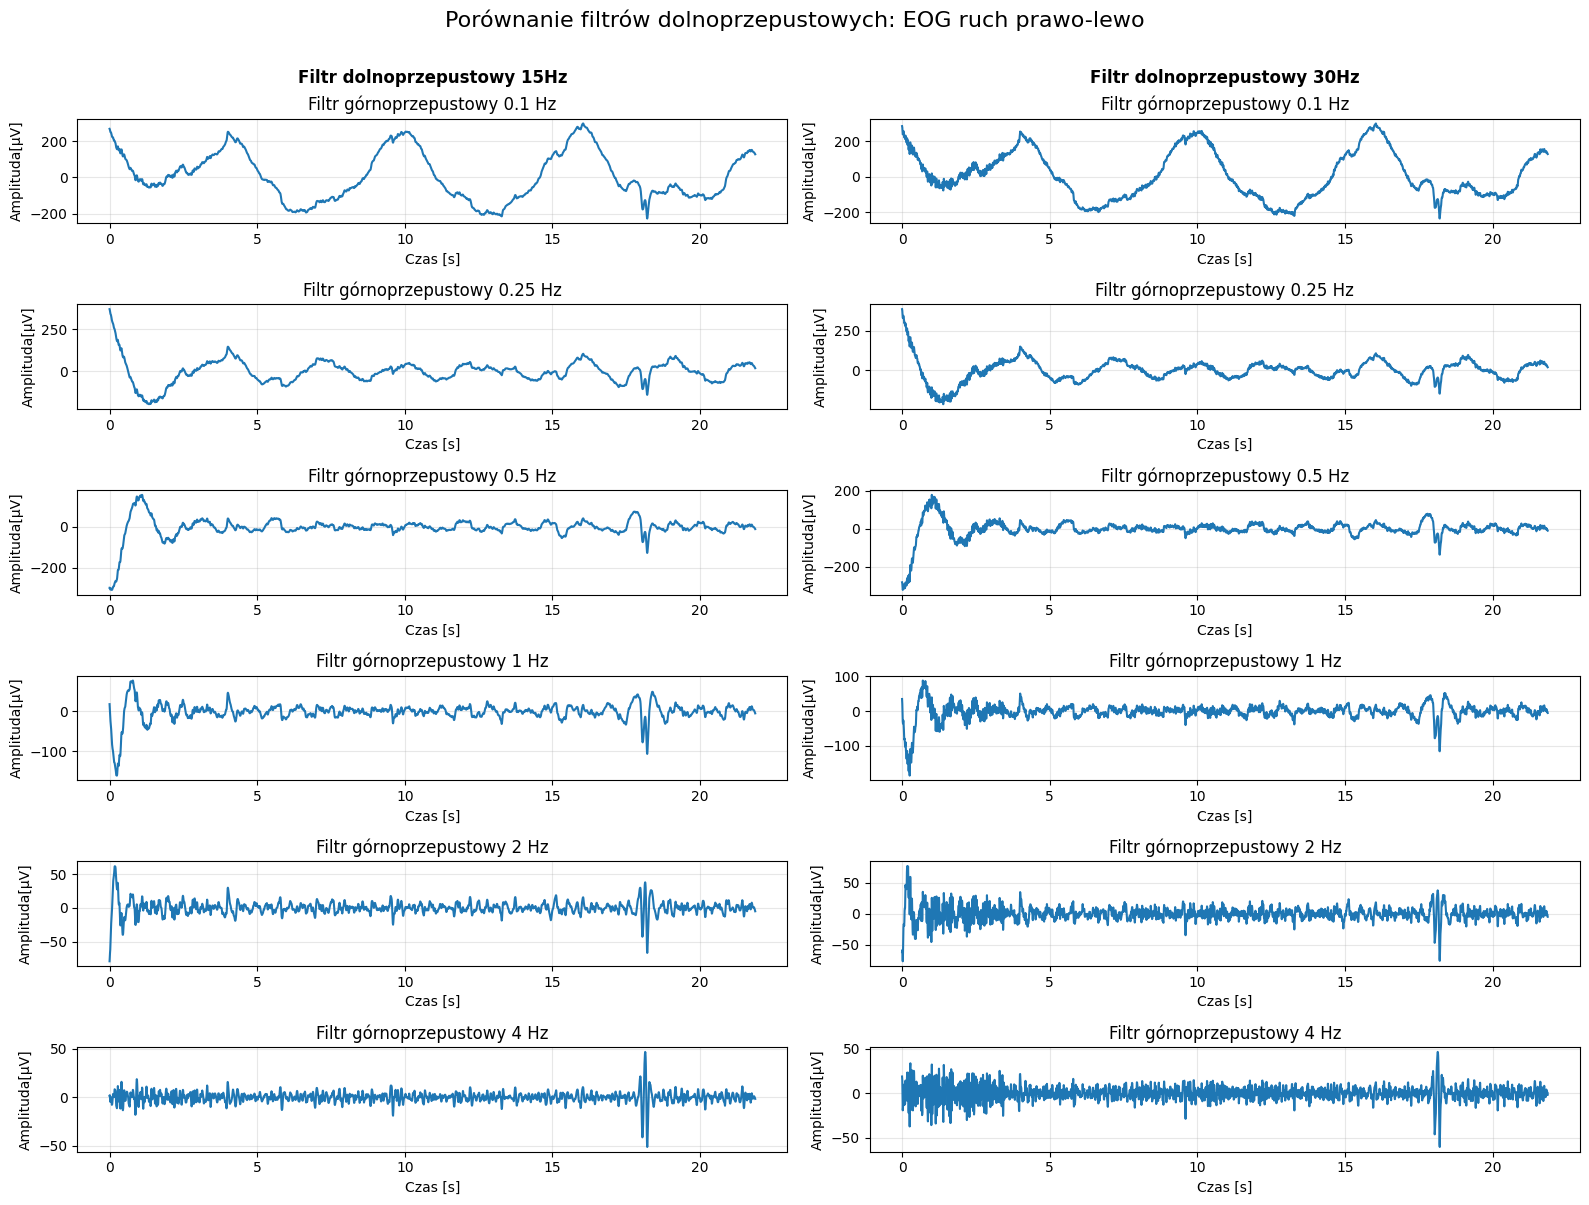

In [185]:
gora_dol, prawo_lewo = wczytywanie("EOGGB.obci.raw")
filtered3 = filtry1(prawo_lewo, fs)
filtered4 = filtry2(prawo_lewo, fs)

freqs = [0.1, 0.25, 0.5, 1, 2, 4]
EOGGB_segments3 = []
EOGGB_segments4 = []

for sig in filtered1:
    segment = sig[6800:9600]
    EOGGB_segments3.append(segment)

for sig in filtered2:
    segment = sig[6800:9600]
    EOGGB_segments4.append(segment)

t = np.arange(0, len(EOGGB_segments3[0])/fs, 1/fs)
plt.figure(figsize=(16, 12))
plt.suptitle('Porównanie filtrów dolnoprzepustowych: EOG ruch prawo-lewo', fontsize=16, y=1)

for i in range(6):
    # Lewa kolumna 15Hz
    plt.subplot(6, 2, 2*i + 1)
    plt.plot(t, EOGGB_segments3[i])
    plt.title(f'Filtr górnoprzepustowy {freqs[i]} Hz')
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda[μV]')
    plt.grid(True, alpha=0.3)

    # nagłówek 1 kolumny
    if i == 0:
        plt.text(0.5, 1.3, 'Filtr dolnoprzepustowy 15Hz',
                transform=plt.gca().transAxes, ha='center', va='bottom',
                fontsize=12, fontweight='bold')

    # Prawa kolumna 30Hz
    plt.subplot(6, 2, 2*i + 2)
    plt.plot(t, EOGGB_segments4[i])
    plt.title(f'Filtr górnoprzepustowy {freqs[i]} Hz')
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda[μV]')
    plt.grid(True, alpha=0.3)

    # nagłówek 2 kolumny
    if i == 0:
        plt.text(0.5, 1.3, 'Filtr dolnoprzepustowy 30Hz',
                transform=plt.gca().transAxes, ha='center', va='bottom',
                fontsize=12, fontweight='bold')
        plt.tight_layout()

plt.tight_layout()
plt.show()

Jak widać na powyższych wykresach przedstawiająch sygnały EOG lewo-prawo,podobnie jak w przypadku ruchów góra dół można zauważyć,że wraz ze wzrostem częstotliwości przenoszenia dla filtrów górnopzrepustowych, sygnał zaczyna byc mniej dokładny i bardziej chaotyczny oraz zaszumiony. W porównaniu działania filtrów dolnoprzepustowych o częstotliwości przenoszenia odpowiednio 15Hz oraz 30Hz, można zauważyć, że w głównej mierze ma on wpływ na szumy oraz "grubość" sygnału, która w tym przypadku jest dużo bardziej zauważalna niż w poprzednim przypadku. Zatem, można przyjąć, że efektywniejszym filtrem dolnoprzepustowym jest ten o częstotliwości 15Hz.

Następnie pokazano, różnice pomiędzy sygnałami góra-dół, lewo-prawo
Jak można zauważyć na poniższych wykresach, sygnały są w przeciwfazie, co ładnie obrazuje różnice pomiędzy tymi dwoma ruchami

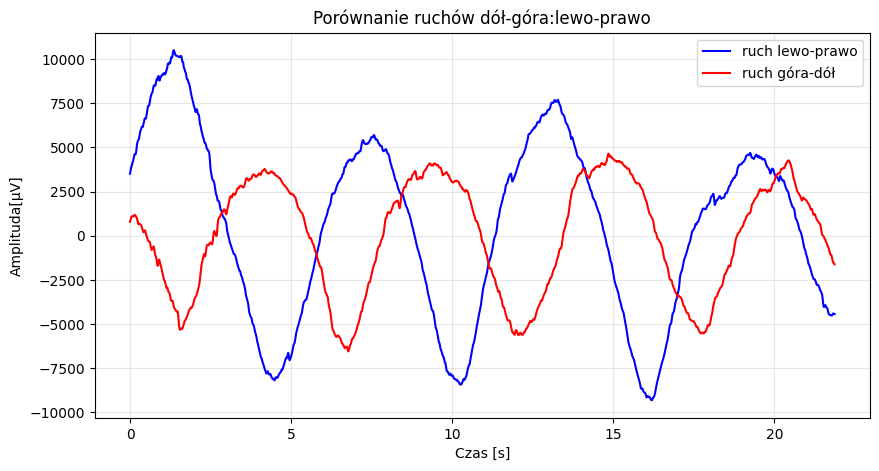

In [186]:
gora_dol, prawo_lewo = wczytywanie("EOGGB.obci.raw")
porownanie1 = filtry15(prawo_lewo,fs)
porownanie2 = filtry15(gora_dol,fs)

t1 = np.arange(0, len(porownanie1[6800:9600])/fs, 1/fs)
t2 = np.arange(0, len(porownanie2[2000:4800])/fs, 1/fs)

plt.figure(figsize = (10,5))
plt.plot(t1,porownanie1[6800:9600], color = "blue", label = "ruch lewo-prawo")
plt.plot(t2,porownanie2[2000:4800], color = "red", label = "ruch góra-dół")
plt.title('Porównanie ruchów dół-góra:lewo-prawo')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda[μV]')
plt.grid(True, alpha=0.3)
plt.legend()

### Ćwiczenie 2:
W następnym ćwiczeniu wykonano analize intencjonalnych oraz nieintencjonalnych mrugnięć w sygnałach EOG.

1500


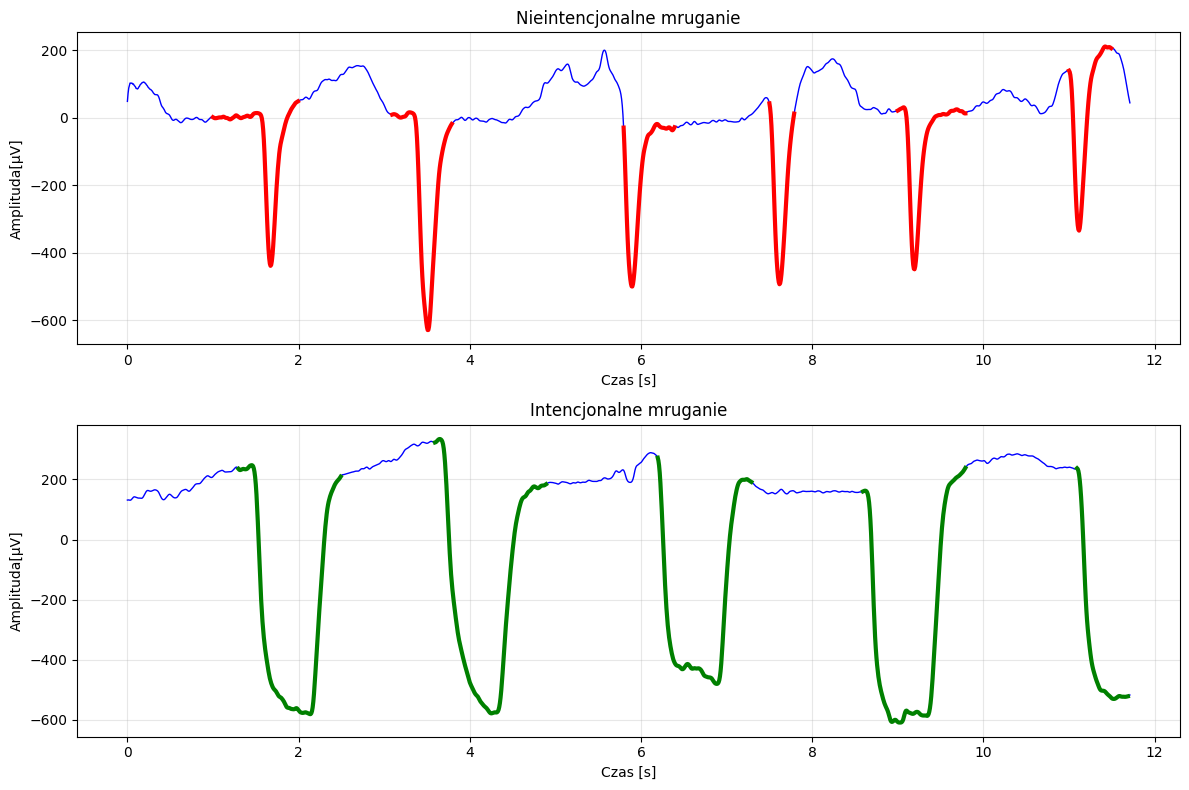

In [191]:
m1, m2 = wczytywanie("Mruganie.obci.raw") # tutaj ten m2 jest nie potrzebny, ponieważ do analizy mrugnięc ruchy lewo-prawo nas nie interesują
mruganie1 = filtry(m1,fs)
tm = np.arange(0,len(mruganie1[0:1500])/fs,1/fs)
tm1 = np.arange(0,len(mruganie1[3800:5300])/fs,1/fs)

print(len(mruganie1[0:1500]))

plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
plt.plot(tm, mruganie1[0:1500], 'blue', linewidth=1)
plt.title('Nieintencjonalne mruganie')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda[μV]')
plt.grid(True, alpha=0.3)

blinks_involuntary = [
    (1.0, 2.0, 'red', 'Mrugnięcie 1'),
    (3.1, 3.8, 'red', 'Mrugnięcie 2'),
    (5.8, 6.4, 'red', 'Mrugnięcie 3'),
    (7.5, 7.8, 'red', 'Mrugnięcie 4'),
    (9.0 ,9.8, 'red', 'Mrugnięcie 5'),
    (11.0, 11.5, 'red', 'Mrugnięcie 6')
]

for start_time, end_time, color, label in blinks_involuntary:
    start_idx = int(start_time * fs)
    end_idx = int(end_time * fs)
    if end_idx <= len(mruganie1[0:1500]):
        plt.plot(tm[start_idx:end_idx], mruganie1[start_idx:end_idx],
                color=color, linewidth=3, label=label)

plt.subplot(2,1,2)
plt.plot(tm1, mruganie1[3800:5300], 'b-', linewidth=1)
plt.title('Intencjonalne mruganie')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda[μV]')
plt.grid(True, alpha=0.3)

blinks_voluntary = [
    (1.3, 2.5, 'green', 'Mrugnięcie 1'),
    (3.6, 4.9, 'green', 'Mrugnięcie 2'),
    (6.2, 7.3, 'green', 'Mrugnięcie 3'),
    (8.6, 9.8, 'green', 'Mrugnięcie 4'),
    (11.1, 11.7, 'green', 'Mrugnięcie 5')
]

for start_time, end_time, color, label in blinks_voluntary:
    start_idx = int(start_time * fs)
    end_idx = int(end_time * fs)
    if end_idx <= len(mruganie1[3800:5300]):
        plt.plot(tm1[start_idx:end_idx], mruganie1[3800:5300][start_idx:end_idx],
                color=color, linewidth=3, label=label)

plt.tight_layout()
plt.show()

Jak można zauważyć, na powyższych wykresach zestawiono ze sobą wycinki sygnałów przedstawiające nieintencjonalne ora zintencjonalne mrugnięcia. Patrząc na te wykresy można stwierdzić, że nieintencjonalne mrugnięcia są częstsze i krótsze czasowo, natomiast intecjonalne dłuższe, a ich częstość zależna bezpośrednio od osoby badanej

Następnie wycięto fragmenty sygnałów wokół mrugnięć mimowolnych i wolicjonalnych i na wykresie nałożono na siebie, wycentrowane wokół maksimum amplitudy, co pozwoli na przeprowadzenie analizy, na ile powtarzalne są przebiegi mrugnieć

Znaleziono 15 mrugnięć nieintencjonalnych
Znaleziono 10 mrugnięć intencjonalnych


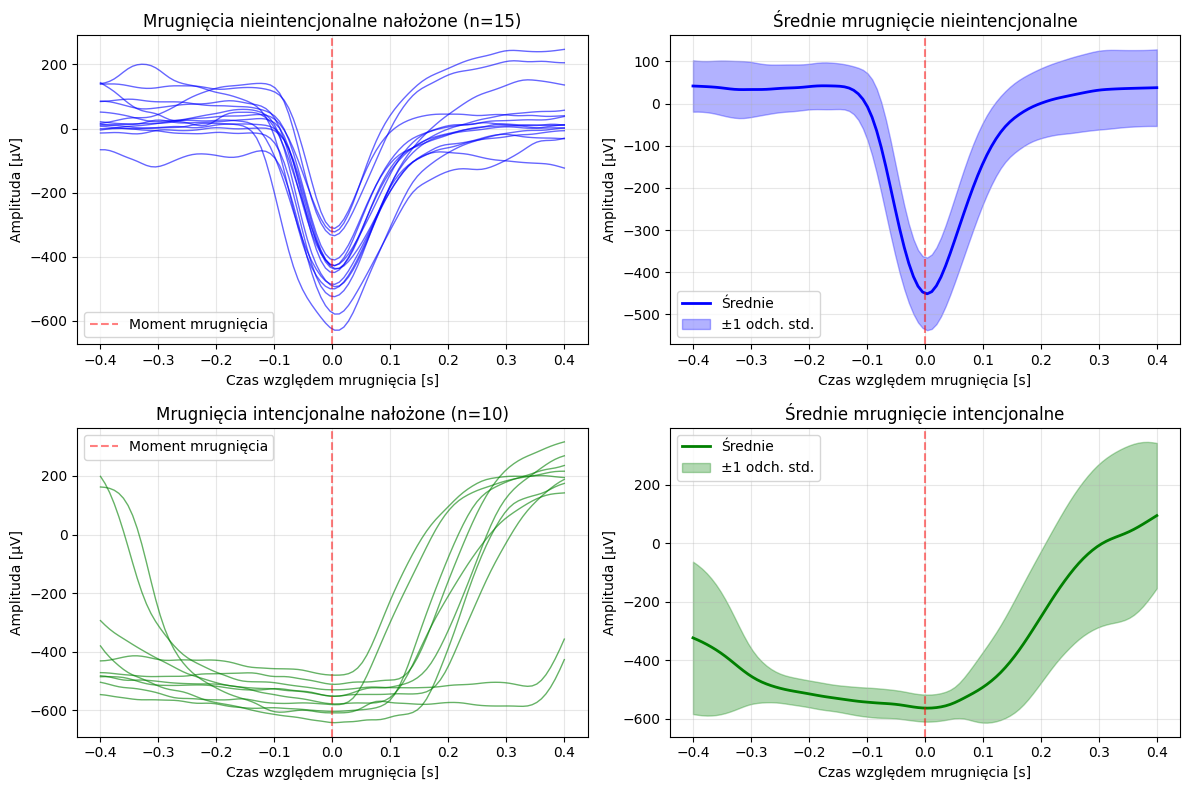

In [188]:
from scipy.signal import find_peaks

m1, m2 = wczytywanie("Mruganie.obci.raw")
mruganie1 = filtry15(m1, fs)
mruganie1 = mruganie1 * 0.0715

def wykrywanie_mrugniec(signal, height_threshold=-3000, distance=int(0.5*fs)):
    #mrugnięcia to spadki amplitudy
    peaks, _ = find_peaks(-signal, height=-height_threshold, distance=distance)
    return peaks

def wycinka_segmentow(signal, blink_indices, window_samples=int(0.4*fs)):
    segments = []

    for blink_idx in blink_indices:
        start = max(0, blink_idx - window_samples)
        end = min(len(signal), blink_idx + window_samples)

        if end - start >= 2 * window_samples * 0.8:  #sprawdzam czy wycinek jest wystarczająco długi
            segment = signal[start:end]
            segments.append(segment)

    return segments

involuntary_signal = mruganie1[0:3600]
involuntary_blinks = wykrywanie_mrugniec(involuntary_signal, height_threshold=-4000*0.0715, distance=int(0.3*fs))
involuntary_segments = wycinka_segmentow(involuntary_signal, involuntary_blinks)

voluntary_signal = mruganie1[3800:7400]
voluntary_blinks = wykrywanie_mrugniec(voluntary_signal, height_threshold=-5000*0.0715, distance=int(0.8*fs))
voluntary_segments = wycinka_segmentow(voluntary_signal, voluntary_blinks)

print(f"Znaleziono {len(involuntary_segments)} mrugnięć nieintencjonalnych")
print(f"Znaleziono {len(voluntary_segments)} mrugnięć intencjonalnych")

window_samples = int(0.4*fs)  # 400ms w każdą stronę
time_axis = np.linspace(-0.4, 0.4, 2*window_samples)

plt.figure(figsize=(12, 8))

# Wykres 1: Wszystkie mrugnięcia nieintencjonalne nałożone
plt.subplot(2, 2, 1)
for i, segment in enumerate(involuntary_segments):
    if len(segment) == len(time_axis):  # Sprawdź zgodność długości
        plt.plot(time_axis, segment, 'b-', alpha=0.6, linewidth=1)
plt.title(f'Mrugnięcia nieintencjonalne nałożone (n={len(involuntary_segments)})')
plt.xlabel('Czas względem mrugnięcia [s]')
plt.ylabel('Amplituda [μV]')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Moment mrugnięcia')
plt.legend()

# Wykres 2: Średnie mrugnięcie nieintencjonalne
plt.subplot(2, 2, 2)
if involuntary_segments:
    min_len = min(len(seg) for seg in involuntary_segments)
    aligned_segments = [seg[:min_len] for seg in involuntary_segments]
    time_axis_short = np.linspace(-0.4, 0.4, min_len)

    mean_involuntary = np.mean(aligned_segments, axis=0)
    std_involuntary = np.std(aligned_segments, axis=0)

    plt.plot(time_axis_short, mean_involuntary, 'b-', linewidth=2, label='Średnie')
    plt.fill_between(time_axis_short, mean_involuntary - std_involuntary,
                     mean_involuntary + std_involuntary, alpha=0.3, color='blue', label='±1 odch. std.')

plt.title('Średnie mrugnięcie nieintencjonalne')
plt.xlabel('Czas względem mrugnięcia [s]')
plt.ylabel('Amplituda [μV]')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.legend()

# Wykres 3: Wszystkie mrugnięcia intencjonalne nałożone
plt.subplot(2, 2, 3)
for i, segment in enumerate(voluntary_segments):
    if len(segment) == len(time_axis):  # Sprawdź zgodność długości
        plt.plot(time_axis, segment, 'g-', alpha=0.6, linewidth=1)
plt.title(f'Mrugnięcia intencjonalne nałożone (n={len(voluntary_segments)})')
plt.xlabel('Czas względem mrugnięcia [s]')
plt.ylabel('Amplituda [μV]')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Moment mrugnięcia')
plt.legend()

# Wykres 4: Średnie mrugnięcie intencjonalne
plt.subplot(2, 2, 4)
if voluntary_segments:
    min_len = min(len(seg) for seg in voluntary_segments)
    aligned_segments = [seg[:min_len] for seg in voluntary_segments]
    time_axis_short = np.linspace(-0.4, 0.4, min_len)

    mean_voluntary = np.mean(aligned_segments, axis=0)
    std_voluntary = np.std(aligned_segments, axis=0)

    plt.plot(time_axis_short, mean_voluntary, 'g-', linewidth=2, label='Średnie')
    plt.fill_between(time_axis_short, mean_voluntary - std_voluntary,
                     mean_voluntary + std_voluntary, alpha=0.3, color='green', label='±1 odch. std.')

plt.title('Średnie mrugnięcie intencjonalne')
plt.xlabel('Czas względem mrugnięcia [s]')
plt.ylabel('Amplituda [μV]')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()


PORÓWNANIE TYPÓW MRUGNIĘĆ
- Średnia amplituda mrugnięć nieintencjonalnych: 451.315 ± 86.256 μV
- Średnia amplituda mrugnięć intencjonalnych: 564.243 ± 46.325 μV
- Średni czas trwania mrugnięć nieintencjonalnych: 0.131 ± 0.026 s
- Średni czas trwania mrugnięć intencjonalnych: 0.595 ± 0.068 s

WNIOSKI
Różnice między mrugnięciami nieintencjonalnymi a intencjonalnymi:
- Mrugnięcia intencjonalne mają większą amplitudę
- Mrugnięcia intencjonalne trwają dłużej
- Powtarzalność można ocenić na podstawie odchylenia standardowego na wykresach średnich


### Ćwiczenie 3:
W tym ćwiczeniu przeprowadzono analize sygnałów EOG w trakcie czytania w języku ojczystym oraz w języku

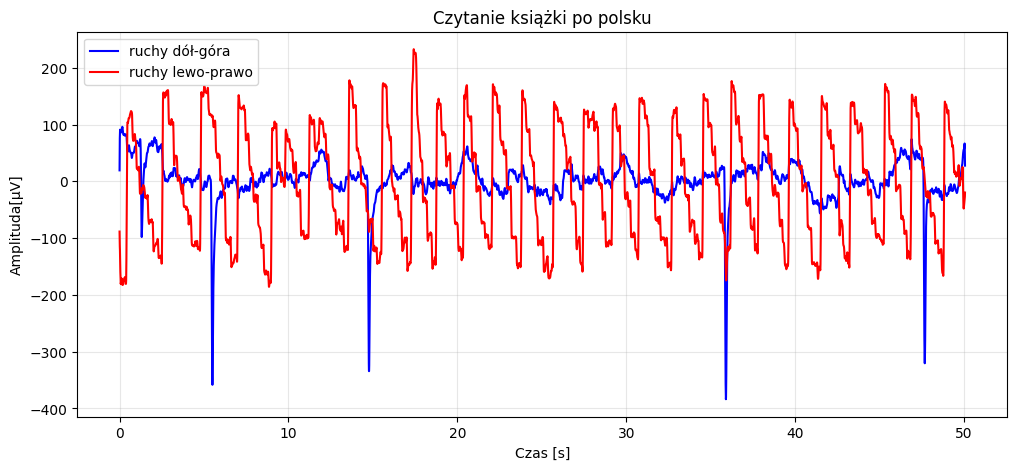

In [189]:
pl1, pl2 = wczytywanie("CzytaniePL.obci.raw")

czytaniepl1 = filtry(pl1,fs)
czytaniepl2 = filtry(pl2,fs)

plt.figure(figsize=(12,5))
tpl1 = np.arange(0,len(pl1)/fs,1/fs)

plt.title("Czytanie książki po polsku")
plt.plot(tpl1,czytaniepl1, color = "blue", label = "ruchy dół-góra")
plt.plot(tpl1,czytaniepl2, color = "red", label = "ruchy lewo-prawo")
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda[μV]')
plt.grid(True, alpha = 0.3)
plt.legend()


Na powyższym wykresie mozna zauważyć bardzo ciekawą zależność. Czerwony wykres przedstawia ruchy prawo-lewo. Warto zauważyć, że przy zmianie wzroku na nową linijke, zauważalna jest gwałtowana zmiana amplitudy i powrót do wartości początkowej amplitudy. Niebieski wykres przedstawia ruchy góra-dół. Ciekawą rzeczą jaką można tutaj zauważyć to ilość mrugnięć podczas czytania. Można byłoby sie spodziewać, że osoba czytająca będzie mrugać podobnie jak w momencie spoczynku czy wykonywania innych czynności, natomiast tutaj możemy zauważyć, że te mrugnięcią są bardzo rzadkie i występuje ich tylko mniej więcej ~ 5 na minute

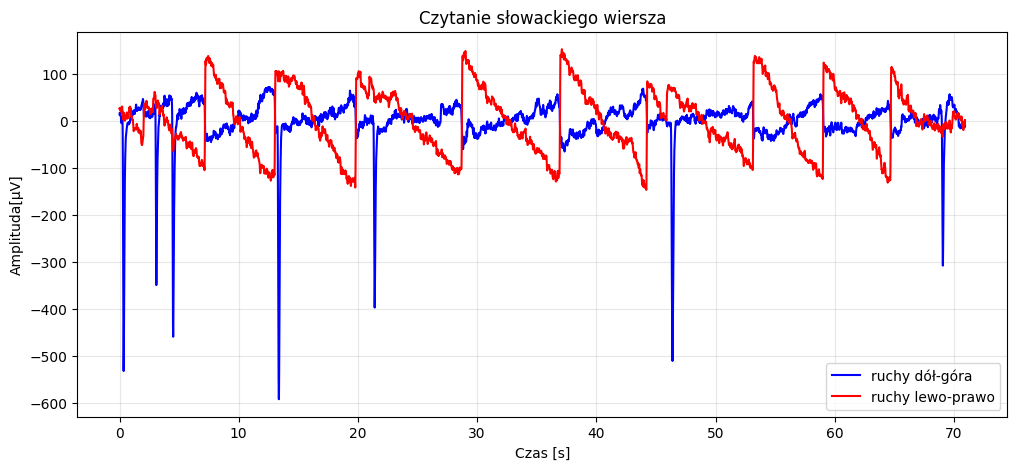

In [190]:
sl1, sl2 = wczytywanie("CzytanieSL.obci.raw")

czytaniesl1 = filtry(sl1,fs)
czytaniesl2 = filtry(sl2,fs)

plt.figure(figsize=(12,5))
tsl1 = np.arange(0,len(sl1)/fs,1/fs)

plt.title("Czytanie słowackiego wiersza")
plt.plot(tsl1,czytaniesl1, color = "blue", label = "ruchy dół-góra")
plt.plot(tsl1,czytaniesl2, color = "red", label = "ruchy lewo-prawo")
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda[μV]')
plt.grid(True, alpha = 0.3)
plt.legend()

Porównując ten wykres z wykresem czytania książki w języku ojczystym można zauważyć, że długość czasu potrzebna na przejście z jednej linijki do drugiej jest dużo dłuższa, co może sugerować, że osoba badana musiała się dłużej zastanawiać nad sensem wiersza, który czytała.